### following folder must be in the base_path, written in the same way:
#### QuPath
#### Images
#### Annotations

### Set up base_path and labels here:

In [18]:
# autoreload
%load_ext autoreload
%autoreload 2

if False:
    base_path = r"F:\Annemarie\CRPS_DL\QuPath_P3\run_2"
    labels = ['Carpal', 'Metacarpal', 'Phalangeal']
elif False:
    base_path = r"F:\Annemarie\CRPS_DL\QuPath_P1-2\run_3"
    labels = ['whole hand']
else:
    base_path = r"F:\Annemarie\CRPS_DL\foot\merge"
    labels = ['whole foot']

#base_path = "\\\\NAS6B755D/Public/Annemarie/Glia Dataset/"
#labels = ['DAPI', 'NF', 'FABP7', 'APOJ']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### advanced settings

In [19]:
project_data_dict = {
    "base_path": base_path,
    "out_classes": ["cell", None, None, None],
    "mode": "brightfield, fluorescence",
    "max_signal": 2**12,
    "different_pages": False,
    "one_channel": True,
    "downscale": 1,
    "channels":[0],
    "use_regions":False
}

### Loading and splitting data

Loading data:


  0%|          | 0/33 [00:00<?, ?it/s]

split into training: 26, and validation: 7
split into training: 23, valid: 6, and testing: 4


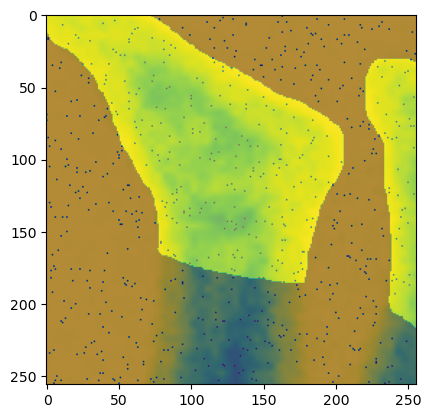

In [20]:
from dataloader_ml import DataLoader

data = DataLoader(base_path, labels, project_data_dict)
# run this if you want to change the train/valid ratio of 0.2:
# data.train_valid_split(ratio=0.1)
# run this if you want to test on unseen data
data.train_test_split(test_ratio=0.1, valid_ratio=0.2)

# kernel_size and batch_size can be adjusted
data.run_data_loader()
data.show_example_batch()

### Training model
#### you will find the best model and its metrices in 'base_path'/model

In [3]:
from segmagic_ml import Segmagic

seg = Segmagic(base_path)
#seg.train_model(data, wandb_log=True, project='segmagic', entity='anmschulte')

C:\Users\emsch\anaconda3\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


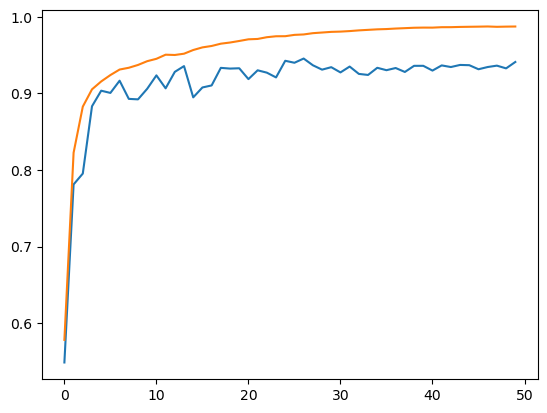

In [66]:
import matplotlib.pyplot as plt
plt.plot(seg.model.tml.metrics['val_f1'].history['micro'])
plt.plot(seg.model.tml.metrics['train_f1'].history['micro'])

In [ ]:
from segmagic_ml import Segmagic

seg = Segmagic(base_path)
seg.train_model_ensemble(3, data, epochs=50, wandb_log=True, project='segmagic', entity='anmschulte')

### Testing model
#### Test results are stored under 'base_path'/Testing

  0%|          | 0/9 [00:00<?, ?it/s]

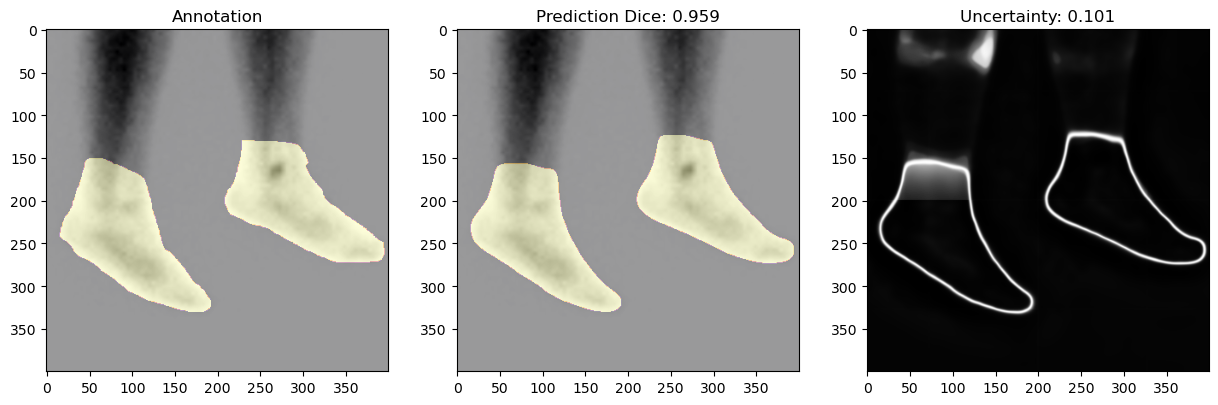

  0%|          | 0/9 [00:00<?, ?it/s]

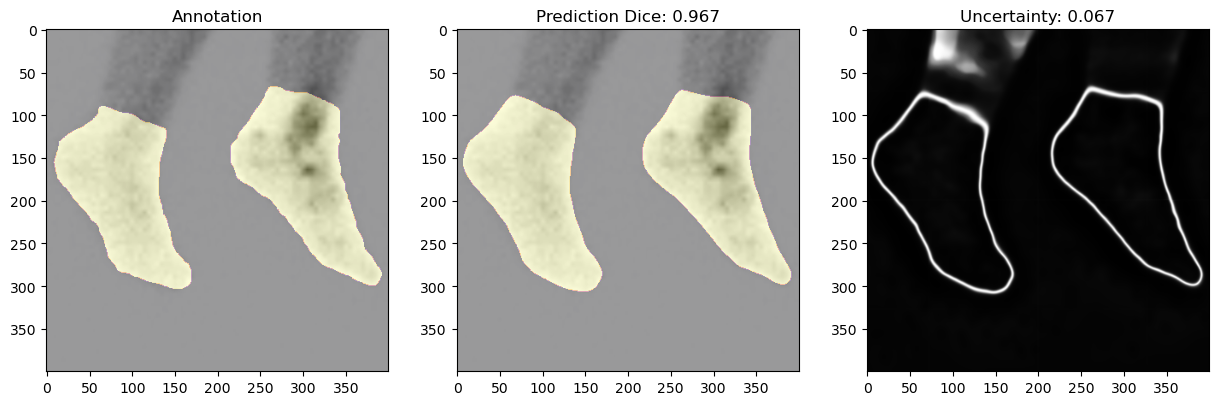

  0%|          | 0/9 [00:00<?, ?it/s]

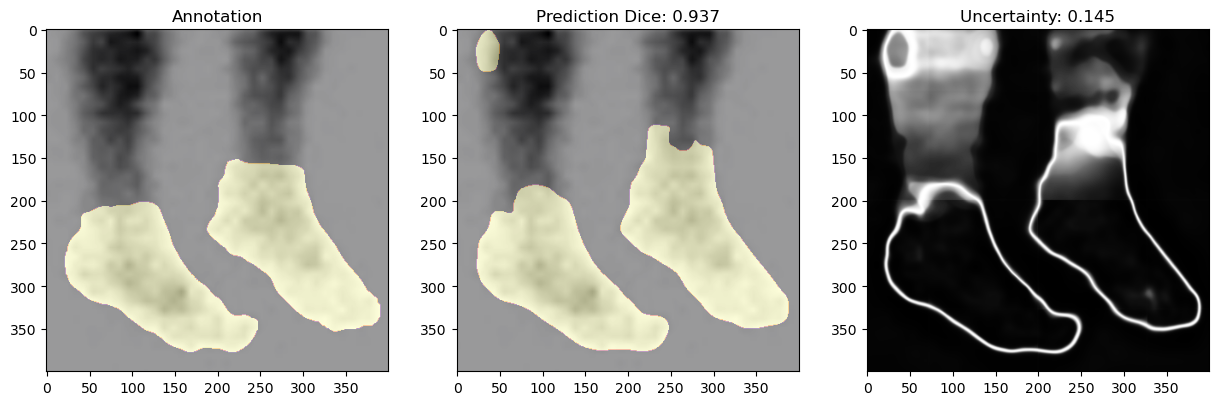

  0%|          | 0/9 [00:00<?, ?it/s]

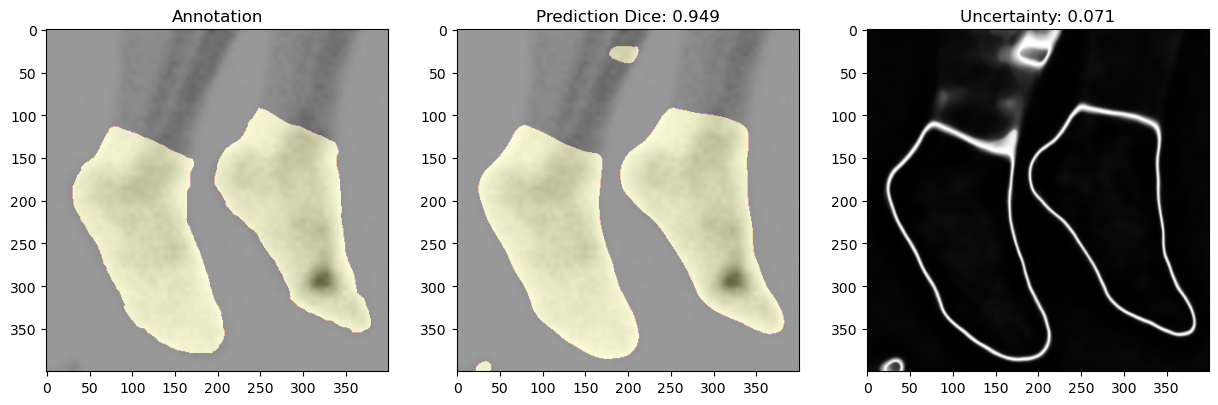

In [21]:
seg = Segmagic(base_path)
################## chose image to predict ##################
seg.test_images(data)
#seg.predict_image(image_to_predict, labels,show=True)

### Prediction on new data
#### execute only this cell if you want to predict image segmentations with an already trained model
#### base_path and labels need to be defined
#### results are stored under 'folder'_pred

In [ ]:
from segmagic_ml import Segmagic
# in base_path, the model(s) to use should be in a folder called "model"
# names of labels need to be defined, you can give it any name you want. Should be the same length as the number of labels in the model.
base_path = r"F:\Annemarie\CRPS_DL\Data Predicted edit\final models\foot"
seg = Segmagic(base_path)
labels = ['whole foot']
################## chose image to predict ##################

#folder = r"F:\Annemarie\CRPS_DL\Data Predicted edit\hands_P1-2\images"
folder = r"F:\Annemarie\CRPS_DL\Data Predicted edit\foot\images"
#folder = r"F:\Annemarie\CRPS_DL\Data Predicted edit\hands_P3\images" 
#folder = r"F:\Annemarie\CRPS_DL\Data Prediction\Images_Validation__OE\Images_Validation_P1-2_OE_gesondert"
#folder = r"F:\Annemarie\CRPS_DL\Data Prediction\Images_Validation__OE\Images_Validation_P3_OE_gesondert"
seg.predict_folder(folder,labels,show=True)